# Fit of 2-contrast NR data from adsorbed Lysozyme on Si

Let us consider a set of two NR measurements (H$_2$O/D$_2$O) from a system of adsorbed Lysozyme protein at the Si/water interface (acquired at pH=7). We can build a simple model where the protein is represented by a single layer. The sld of the protein depends on the solvent due to the exchange of labile hydrogens. So firstly we may import experimental data, set the fit mode and then proceed with model definition.

In [1]:
from anaklasis import ref

# We give a name to the project
project='Lyz_fit_2_contrasts'

# we import the two reflectivity curves acquired at MARIA reflectometer (MLZ)
in_file=['Sample6_Si_Lyz_D2O_refl_master.dat','Sample6_Si_Lyz_H2O_refl_master.dat']

units=['A','A'] # all units in Angstrom
fit_mode=0 # 0 is for linear, 1 is for log
fit_weight=[1,1] # equal fit weight for both curves

method = 'mcmc' # perform MCMC

Now let us define the model (single uniform patch) Si / SiO2 / protein / water and also the model-parameters.

In [2]:
model = [
	# Re_sld Im_sld thk rough solv description
	[  2.07e-6, 0.0, 0, 2.0, 0.0, 'Si'],
	[ 3.5e-6, 0.0, 10, 'p0', 0.0, 'SiO2'],
	[ 'm1', 0.0, 'p1', 'p2', 'p3', 'protein'],
	[  'm0', 0.0,  0, 0.0, 1.0, 'bulk'],
	]

patches=[1.0]
system=[model]

global_param = [
    # param  min  max  description, for type 'uniform'
	['p0', 3.0, 3.0, 'SiO2_roughness','uniform'],
	['p1', 25.0, 40.0, 'protein_thk','uniform'],
	['p2', 0, 10.0, 'protein_rough','uniform'],
	['p3', 0.0, 1.0, 'protein_solv','uniform'],
	]

# Note the multiparameter m0 represents the solvent sld that assumes a different 
# set of bounds for each input curve. We leave the sld a bit free to account
# for potential imperefect solvent exchange during the experiment.
# Note that multiparameter m1 represents the sld of the protein. For the two curves
# the sld is different due to the exchange of labile hydrogens
multi_param = [
	# param  min    max       min      max    description  type
	['m0', 6.0e-6, 6.40e-6, -0.56e-6, 0.5e-6, 'solv_sld','uniform'],
	['m1', 3.45e-6, 3.45e-6,1.98e-6, 1.98e-6, 'solv_sld','uniform']
	]

# No applied constraints
constraints = [
	]

We also set the instrumental parameters

In [3]:
resolution=[-1,-1] # pointwise resolution
background = [
	[0.0,1.0e-5,'uniform'], # background is left free for both curves
	[0.0,1.0e-5,'uniform'],
	]
scale = [
	[1.0,0.2,'normal'], # curve scale is also a free parameter for all curves
	[1.0,0.2,'normal'],
	]

Finally we call the anaklasis.fit function

--------------------------------------------------------------------
Program ANAKLASIS - Fit Module for X-ray/Neutron reflection datasets
version 1.3, June 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Project name: Lyz_fit_2_contrasts
Using chi squared with errors figure of merit (FOM)
Fast fit mode. Using small differential evolution population size
Parameter uncertainity calculation using Markov Chain Monte Carlo
A plot summarizing results will pop-up after the end of the calculation


Directory already exists.. overwriting data..
file#0 experimental points: 56
Q units in inverse A
dQ/Q pointwise
fit weight:  1
file#1 experimental points: 56
Q units in inverse A
dQ/Q pointwise
fit weight:  1
free parameters =  9


list of free parameters: p1 (protein_thk),p2 (protein_rough),p3 (protein_solv),bkg curve#0,bkg curve#1,scale curve#0,scale curve#

100%|██████████| 500/500 [00:11<00:00, 45.39it/s]
N/50 = 10;
tau: [59.331 63.929 52.924 53.602 38.759 34.458 49.318 32.17  49.586]
  0%|          | 5/3780 [00:00<01:25, 44.29it/s]

MCMC production run..


100%|██████████| 3780/3780 [01:25<00:00, 44.26it/s]

Calculating mean curves...
  0%|          | 0/352 [00:00<?, ?it/s]

100%|██████████| 352/352 [00:14<00:00, 24.19it/s]
Plotting curves... please wait...


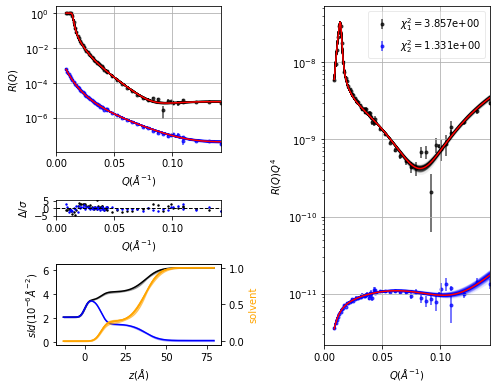

--------------------------------------------------------------------
Final model parameters
--------------------------------------------------------------------


Curve #0


Instrumental Resolution, dQ/Q: pointwise
fit weigth: 1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 (fixed)
Si imaginary sld (10^-6 A^-2) = 0.00 (fixed)
Si thickness (A)              = 0.00 (fixed)
Si/SiO2 roughness (A) = 2.00 (fixed)
Si solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.50 (fixed)
SiO2 imaginary sld (10^-6 A^-2) = 0.00 (fixed)
SiO2 thickness (A)              = 10.00 (fixed)
SiO2/protein roughness (A) = 3.00 (parametric), -> p0
SiO2 solvent volume fraction    = 0.00 (fixed)
--------------------------------------------------------------------
protein real sld (10^-6 A^-2)      = 3.45 (parametric), -> m1
protein imaginary sld (10^-6 A^-2) = 0.00 

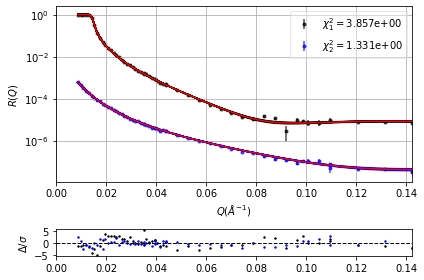

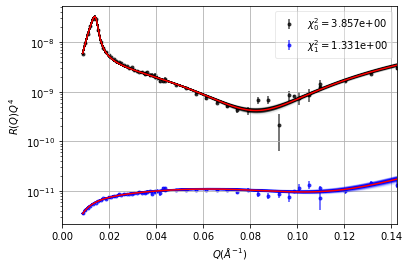

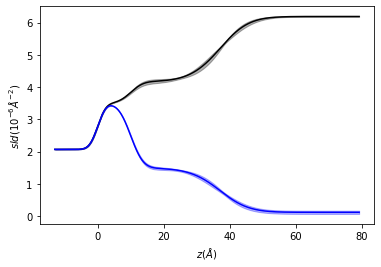

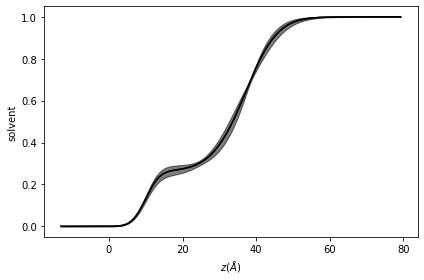

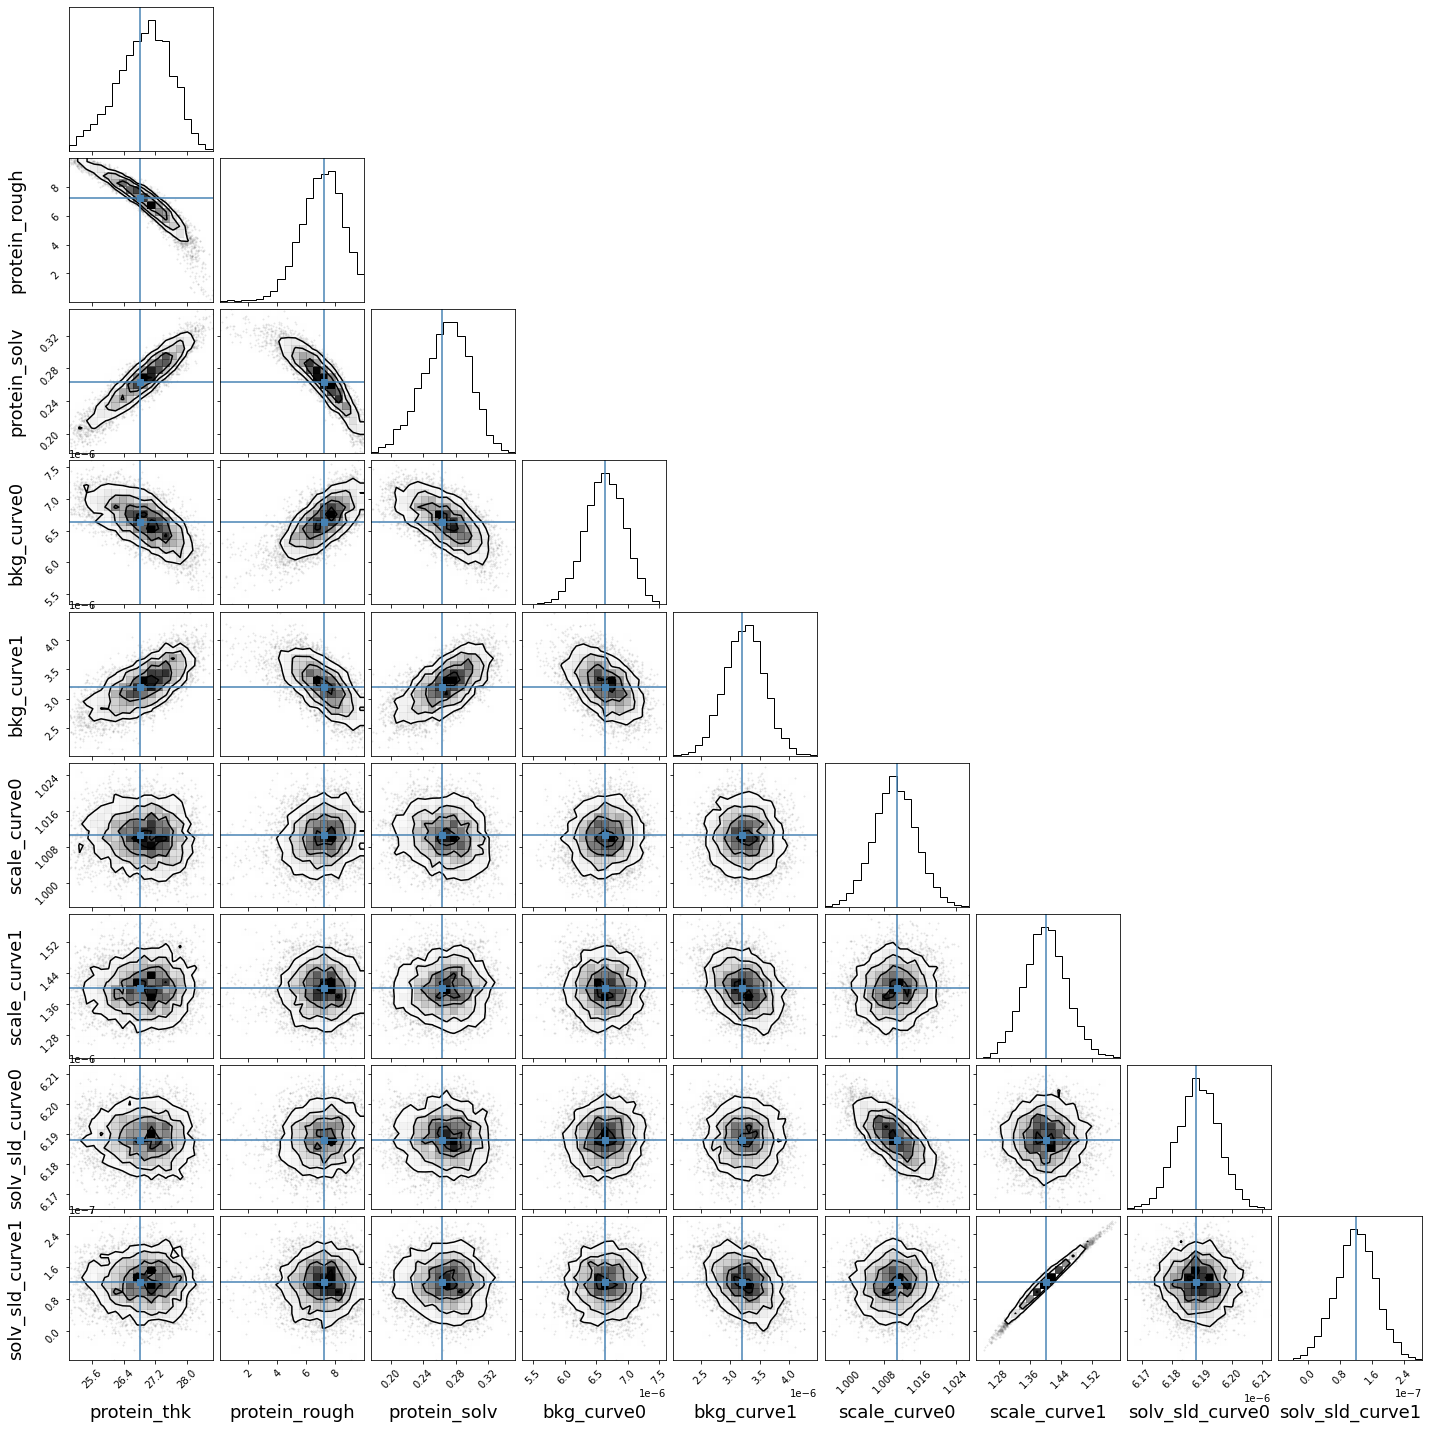

In [4]:
res = ref.fit(project,in_file,units,fit_mode,fit_weight,method,resolution,patches,system,global_param
	,multi_param,constraints,background,scale,experror=True,plot=True,fast=True)

As we can see from the plots, the experimental data are nicely fitted using the defined model.